In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tables
tables.file._open_files.close_all()

## Random Seed

In [2]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [3]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

In [4]:
bunch = Bunch('electron', 10, 4, 10, twiss_x, twiss_y, seed=1314)
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]

In [5]:
bunch2 = Bunch('electron', 10, 4, 10, twiss_x, twiss_y, seed=1314)
particles2 = bunch2.generate_transverse_matched_beam_distribution()
nx = particles2[0,:]
nxp = particles2[1,:]

In [6]:
print (x)
print (nx)

[-0.00230171 -0.02934405  0.01082525 -0.00523984  0.01217208 -0.00271024
 -0.00388655  0.00083462  0.00353221  0.01065466]
[-0.00241987 -0.03085037  0.01138095 -0.00550882  0.01279691 -0.00284937
 -0.00408606  0.00087746  0.00371353  0.0112016 ]


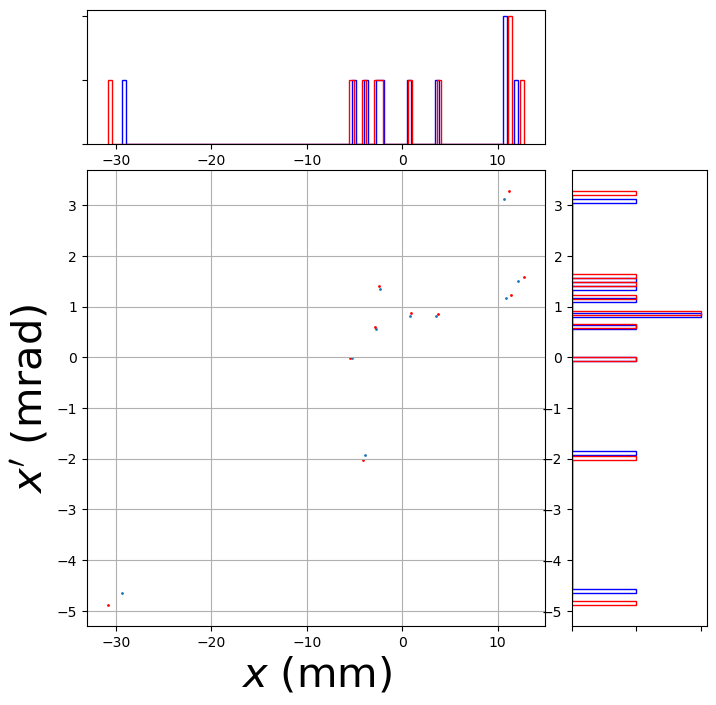

In [7]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Update Twiss Parameters

In [8]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [9]:
fodo_list = [qf, d1, qd, d1, m1]

In [10]:
fodo = Beamline("fodo", fodo_list)

In [11]:
fodo.get_num_beamline_elements()

5

In [12]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   qd quadrupole  0.400 -1.200  5.800
   d1      drift  5.000  0.000 10.800
   m1     marker  0.000  0.000 10.800


In [13]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [14]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [15]:
bunch.twiss_x

[-1.5, 10, 9.985965722173286e-06]

In [16]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.985965722173286e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0168354826394244e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [17]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.98597   10.16835
         1         d1      drift    5.00000    5.40000       9997/     10000    9.98386   10.14930
         2         qd quadrupole    0.40000    5.80000       9349/     10000    9.91710    8.63392
         3         d1      drift    5.00000   10.80000       8943/     10000    8.80483    8.64764
         4         m1     marker    0.00000   10.80000       8943/     10000    8.80483    8.64764


In [18]:
bunch.print_bunch_properties()

number of macro particles : 8943
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 8.804830096445004e-06 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 8.647638673306817e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


In [19]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [20]:
bunch.print_bunch_properties()

number of macro particles : 8943
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 8.804830096445004e-06 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 8.647638673306817e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


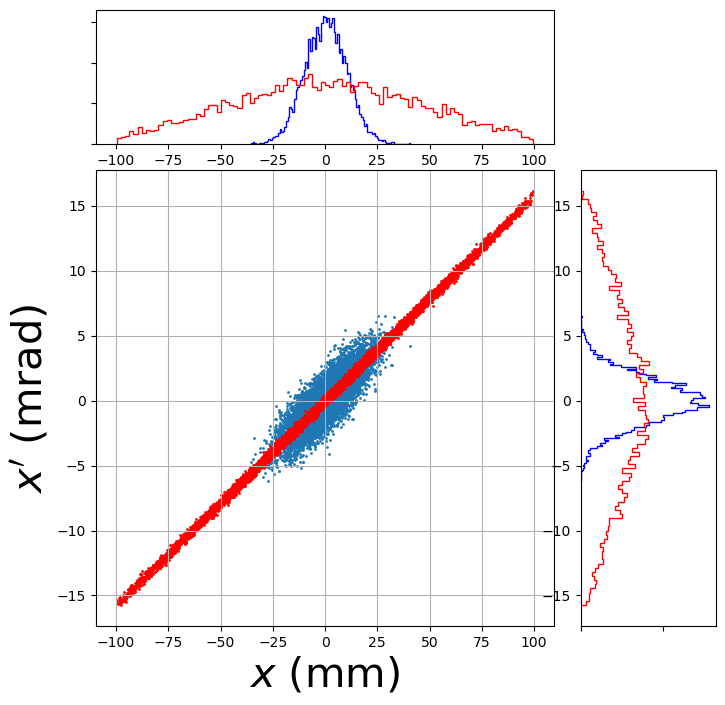

In [21]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

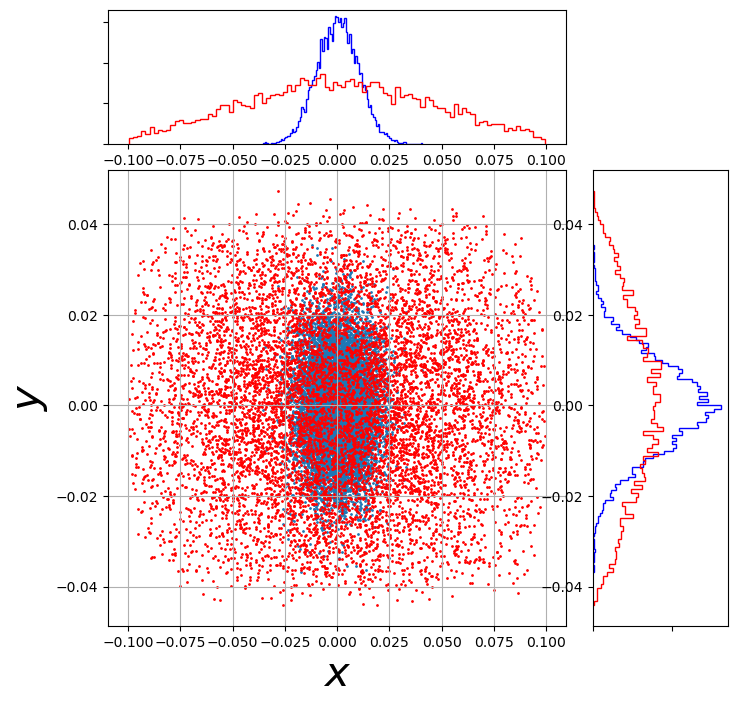

In [22]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Diagnostics

### Particle Diagnostics

In [23]:
import tables
import numpy as np
import os
from matplotlib import pyplot as plt

In [24]:
from elements import *
from beamline import Beamline
from beam import Bunch
from utils import diagnostics

In [25]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [26]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [27]:
if os.path.exists("particle.h5"):
    os.remove("particle.h5")

In [28]:
pdiagnostics = diagnostics.Particle_diagnostics("particle.h5")

In [29]:
pdiagnostics.save_particle_diagnostics(bunch.particle)

In [30]:
h5file = tables.open_file("particle.h5")

In [31]:
h5file.root.particle

/particle (Group) 'particle data'
  children := ['beta' (Array), 'charge' (Array), 'energy' (Array), 'gamma' (Array), 'mass' (Array), 'momentum' (Array), 'species' (Array)]

In [32]:
for i in h5file.root.particle:
    if i.name == "species":
        print ("%10s %10s" % (i.name, i.read()[0].decode('ASCII')))
    else:
        print ("%10s %10.5f" % (i.name, i.read()))

      beta    0.99882
    charge   -1.00000
    energy   10.00000
     gamma   20.56951
      mass    0.51100
  momentum    9.98694
   species   electron


In [33]:
h5file.close()

### Bunch Diagnostics

In [34]:
if os.path.exists("bunch.h5"):
    os.remove("bunch.h5")

In [35]:
bdiagnostics = diagnostics.Bunch_diagnostics("bunch.h5")

In [36]:
bdiagnostics.save_bunch_diagnostics(bunch)

In [37]:
h5file = tables.open_file("bunch.h5")

In [38]:
h5file.root

/ (RootGroup) 'Bunch Data'
  children := ['diagnostics' (Group), 'twiss' (Group), 'particles' (Array)]

In [39]:
h5file.root.particles.read()

array([[-0.00361816, -0.01271999, -0.00917978, ..., -0.00391737,
         0.003651  , -0.00010699],
       [-0.00014591, -0.00222979, -0.0006419 , ..., -0.00153368,
        -0.00012179, -0.00017326],
       [-0.00912413,  0.00713014, -0.02145721, ..., -0.00085271,
        -0.00056768,  0.00256279],
       [ 0.00090529, -0.00066106,  0.00497279, ...,  0.00166127,
         0.00029613, -0.00089188]])

In [40]:
h5file.root.diagnostics

/diagnostics (Group) 'Bunch diagnostics data'
  children := ['num_particles' (Array), 'std_x' (Array), 'std_xp' (Array), 'std_y' (Array), 'std_yp' (Array)]

In [41]:
for i in h5file.root.diagnostics:
    print ("%12s %10.5f" % (i.name, i.read()))

num_particles 10000.00000
       std_x    0.00997
      std_xp    0.00179
       std_y    0.01002
      std_yp    0.00182


In [42]:
h5file.root.twiss

/twiss (Group) 'Twiss data'
  children := ['alpha_x' (Array), 'alpha_y' (Array), 'beta_x' (Array), 'beta_y' (Array), 'emit_x' (Array), 'emit_y' (Array)]

In [43]:
for i in h5file.root.twiss:
    print ("%12s %10.5f" % (i.name, i.read()))

     alpha_x   -1.50000
     alpha_y    1.50000
      beta_x   10.00000
      beta_y   10.00000
      emit_x    0.00001
      emit_y    0.00001


In [44]:
h5file.close()

## Beamline Diagnostics

In [45]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt
from utils import diagnostics
import os
from tables import *

In [46]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [47]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y, seed=24289)

In [48]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [49]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [50]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [51]:
fodo = Beamline("fodo", fodo_list)

In [52]:
bldiagnostics = diagnostics.Beamline_diagnostics("beamline.h5")

In [53]:
bldiagnostics

In [54]:
bldiagnostics.save_bunch_diagnostics(bunch)

In [55]:
h5file = open_file("beamline.h5")

In [56]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [57]:
h5file.root.beamline.s

/beamline/s (EArray(1,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [58]:
for i in h5file.root.beamline.s:
    print (i)

0.0


In [59]:
h5file.close()

### Beamline Test

In [60]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y, seed=24289)

In [61]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [62]:
fodo2 = Beamline("fodo", fodo_list, True)

In [63]:
fodo2.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000   10.13482   10.16256
         1         d1      drift    5.00000    5.40000       9999/     10000   10.13565   10.15543
         2         b1      sbend    1.50000    6.90000       9982/     10000   10.13155   10.06206
         3         d1      drift    5.00000   11.90000       9473/     10000    9.99433    8.81568
         4         qd quadrupole    0.40000   12.30000       9467/     10000    9.95963    8.81422
         5         d1      drift    5.00000   17.30000       5753/     10000    5.00914    7.78933
         6         b1      sbend    1.50000   18.80000       4039/     10000    4.40140    5.60533
         7         d1      drift    5.00000   23.80000       1848/     10000    3.74533    2.71287
         8         m1     marker    0.00000   23.80000       1848/     10000    3.74533    2.71287


In [64]:
h5file = open_file("beamline.h5")

In [65]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [66]:
h5file.root.beamline.s

/beamline/s (EArray(11,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [67]:
for i in h5file.root.beamline.s:
    print (i)

0.0
0.0
0.4
5.4
6.9
11.9
12.3
17.3
18.8
23.8
23.8


In [68]:
for i in h5file.root.twiss.emit_x:
    print (i)

1.0134820648868198e-05
1.0134820648868198e-05
1.0134820648868201e-05
1.013565083016217e-05
1.0131554486043482e-05
9.994331748281792e-06
9.959629063541086e-06
5.009136914281669e-06
4.40139760242605e-06
3.7453273376997203e-06
3.7453273376997203e-06


In [69]:
for i in h5file.root.twiss.beta_x:
    print (i)

10.0
10.0
9.300724614618339
7.055530318067579
15.763887749415067
58.12781715086643
75.24321923724224
1001.2668133387202
1292.3593278285514
1707.3766328751396
1707.3766328751396


In [70]:
h5file.root.twiss.beta_x

/twiss/beta_x (EArray(11,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [71]:
h5file.close()